<h1><center>CSE391, Quiz 4_pop, Fall 2018 </center></h1>



1. Read the data upload into Documents on Blackboard labeled as Quiz4Data.csv. The column 2 to 10 contain the features and column 1 contains labels.  Use SVM and Navie Bayes classifiers to classify this data and report  TPR, FDR, sensitivity?
2. Compare the performance of these two classifiers and show them in a bar plot
4. Set the value of C ( the regularization factor) to 0,10, 100. How the TPR chages with different vaues of C? Can you suggest a way to find the optimal C? 

3. What are the two features that have the most correlation?




In [117]:
# quiz
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


## 1. reads the data
Churn = pd.read_csv('/Users/nafi/downloads/Quiz4Data.csv')
Churn.fillna(Churn.mean(), inplace=True)
X = Churn.iloc[:,1:]
y = Churn.iloc[:,0]
class_names = [0,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
clf_svm = svm.SVC(kernel='linear', C=100)
y_pred = clf_svm.fit(X_train, y_train).predict(X_test)
cmt_svm = ConfusionMatrix(y_test, y_pred)
fdr_svm = cmt.FDR
print("FDR is :" , fdr_svm, "\n")
tpr_svm  = cmt.TPR
print("TPR is :" , tpr_svm, "\n")

0.0666666666667
nan
FDR is : 0.06222222222222222 

1.0
0.0
TPR is : 0.9333333333333333 



C:\Users\nafi\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)


In [114]:
clf_nb = GaussianNB()
y_pred = clf_nb.fit(X_train, y_train).predict(X_test)
# Compute confusion matrix
cmt_nb = ConfusionMatrix(y_test, y_pred)
tpr_nb = cmt_nb.TPR
print ("TPR is ", tpr_nb, "\n")
fdr_nb = cmt_nb.FDR
print ("FDR is ", fdr_nb, "\n")

TPR is  0.0 

FDR is  1.0 



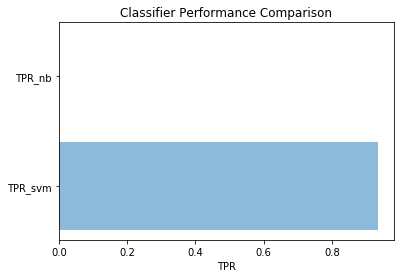

In [101]:
objects = ('TPR_svm', 'TPR_nb')
y_pos = np.arange(len(objects))
performance = [tpr_svm,tpr_nb]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('TPR')
plt.title('Classifier Performance Comparison')
 
plt.show()

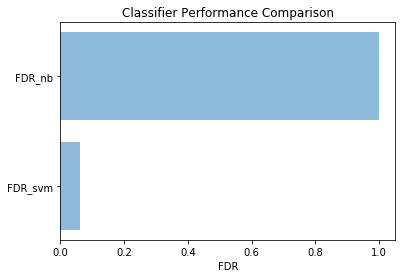

In [102]:
objects = ('FDR_svm', 'FDR_nb')
y_pos = np.arange(len(objects))
performance = [fdr_svm,fdr_nb]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('FDR')
plt.title('Classifier Performance Comparison')
 
plt.show()

Based on the TPR and FDP bar graph, The svm's true positive rate is much higher than the Naive Bayes'. However, the FDR score for naive base is about 7 times higher than FDR of svm. Due to less false classification, svm has better performance. The TPR can be fixed by fixing the C value so that there are minimum amount of data crosses the support vector line. 

Changing the C value to 0,10,100 does not affect the performance of the classifier.